# Implementing Neural Network from scratch

In [95]:
import numpy as np

In [96]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [97]:
X,Y = mnist["data"],mnist["target"]


In [98]:
print(X.shape,Y.shape)

(70000, 784) (70000,)


In [99]:
import numpy as np
X_train,X_test,y_train,y_test = X[:60000],X[60000:],Y[:60000],Y[60000:]


shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

X_train = X_train.T

Y_train = np.zeros((y_train.size,10))
for i in range(y_train.size):
    currEle = y_train[i]
    Y_train[i,int(currEle)] = 1
Y_train = Y_train.T


X_test = X_test.T
Y_test = y_test.T
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(784, 60000) (10, 60000) (784, 10000) (10000,)


In [102]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [103]:
def layer_sizes(X, Y):
    """
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] 
    n_h = 32
    n_y = Y.shape[0] 
    
    return (n_x, n_h, n_y)

In [104]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [105]:
def forward_propagation(X, parameters):
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
   
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [106]:
def compute_cost(A2, Y, parameters):
    """
    Returns:
    cost -- cross-entropy 
    
    """
    
    n_y,m = Y.shape
    cost = 0
    for opclass in range(n_y):
        cost -= (np.dot(np.log(A2[opclass,:]),Y[opclass,:].T) + np.dot(np.log(1-A2[opclass,:]),(1-Y[opclass,:]).T)) / m
   
    
    return cost

In [107]:
def backward_propagation(parameters, cache, X, Y):
    """
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T) / m
    db2 = np.sum(dZ2,axis = 1,keepdims = True) / m
    dZ1 = np.dot(W2.T,dZ2) *(1 - A1**2)
    dW1 = np.dot(dZ1,X.T) / m
    db1 = np.sum(dZ1,axis = 1,keepdims = True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [148]:
def update_parameters(parameters, grads, learning_rate = 0.03):
    """
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [149]:
def nn_model(X, Y, n_h, num_iterations = 2500, print_cost=False):
    """
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
   
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        
        # Forward propagation. 
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. 
        cost = compute_cost(A2,Y,parameters)
 
        # Backpropagation. 
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. 
        parameters = update_parameters(parameters,grads)
        
       
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    print("Cost after iteration",num_iteraions," is",cost)
    return parameters

In [150]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Returns
    predictions -- vector of predictions of our model 
    """
   
    A2, cache = forward_propagation(X,parameters)
    A2 = A2.T
    predictions = np.argmax(A2,axis = 1)
    
    
    return predictions

In [151]:
parameters = nn_model(X_train, Y_train, n_h = 32, num_iterations = 2500, print_cost=True)

Cost after iteration 0: 6.995137
Cost after iteration 100: 3.037606
Cost after iteration 200: 2.464415
Cost after iteration 300: 2.030368
Cost after iteration 400: 1.759583
Cost after iteration 500: 1.527131
Cost after iteration 600: 1.375309
Cost after iteration 700: 1.260354
Cost after iteration 800: 1.150775
Cost after iteration 900: 1.077902
Cost after iteration 1000: 1.017036
Cost after iteration 1100: 1.010322
Cost after iteration 1200: 0.929527
Cost after iteration 1300: 0.911840
Cost after iteration 1400: 0.930197
Cost after iteration 1500: 0.886183
Cost after iteration 1600: 0.832406
Cost after iteration 1700: 0.818659
Cost after iteration 1800: 0.819618
Cost after iteration 1900: 0.783638
Cost after iteration 2000: 0.797564
Cost after iteration 2100: 0.775031
Cost after iteration 2200: 0.767303
Cost after iteration 2300: 0.776254
Cost after iteration 2400: 0.751330


In [152]:
print(int(Y_test[0]))
predictions = predict(parameters, X_test)
print(predictions.shape)

7
(10000,)


In [153]:
accuracy = 0
for i in range(Y_test.size):
    if int(Y_test[i]) == predictions[i]:
        accuracy += 1
        
accuracy = accuracy/Y_test.size
print("Accuracy on test set is =",accuracy*100)

Accuracy on test set is = 87.3


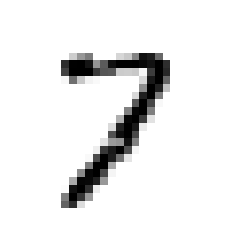

Predicted = 7
Actual value = 7


In [166]:
import random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index = random.randint(0,10000)
some_digit = X_test[:,index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
plt.axis("off")
plt.show()
print("Predicted =",predictions[index])
print("Actual value =",Y_test[index])